<a href="https://colab.research.google.com/github/DeepMalviya1/ML_Task_Submission_Deep_Malviya/blob/main/Task_2_Deep_Malviya_pyfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mngo
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/Step_i/Data_file.xlsx - Data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Step_i/Test_data_file.xlsx - Prediction - Test_data_file.xlsx - Prediction.csv')

##Dataset Observation

In [3]:
train_data.head(5)

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S.No.                 1338 non-null   int64 
 1   College               1338 non-null   object
 2   Role                  1338 non-null   object
 3   City type             1338 non-null   object
 4   Previous CTC          1338 non-null   object
 5   Previous job changes  1338 non-null   int64 
 6   Graduation marks      1338 non-null   int64 
 7   Exp (Months)          1338 non-null   int64 
 8   CTC                   1338 non-null   object
dtypes: int64(4), object(5)
memory usage: 94.2+ KB


In [5]:
train_data.describe()

,S.No.,Previous job changes,Graduation marks,Exp (Months)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,2.525411,59.890882,39.207025
std,386.391641,1.123502,14.894696,14.049960
min,1.000000,1.000000,35.000000,18.000000
25%,335.250000,2.000000,47.000000,27.000000
50%,669.500000,3.000000,60.000000,39.000000
75%,1003.750000,4.000000,73.000000,51.000000
max,1338.000000,4.000000,85.000000,64.000000


##Finding Null values in both dataset

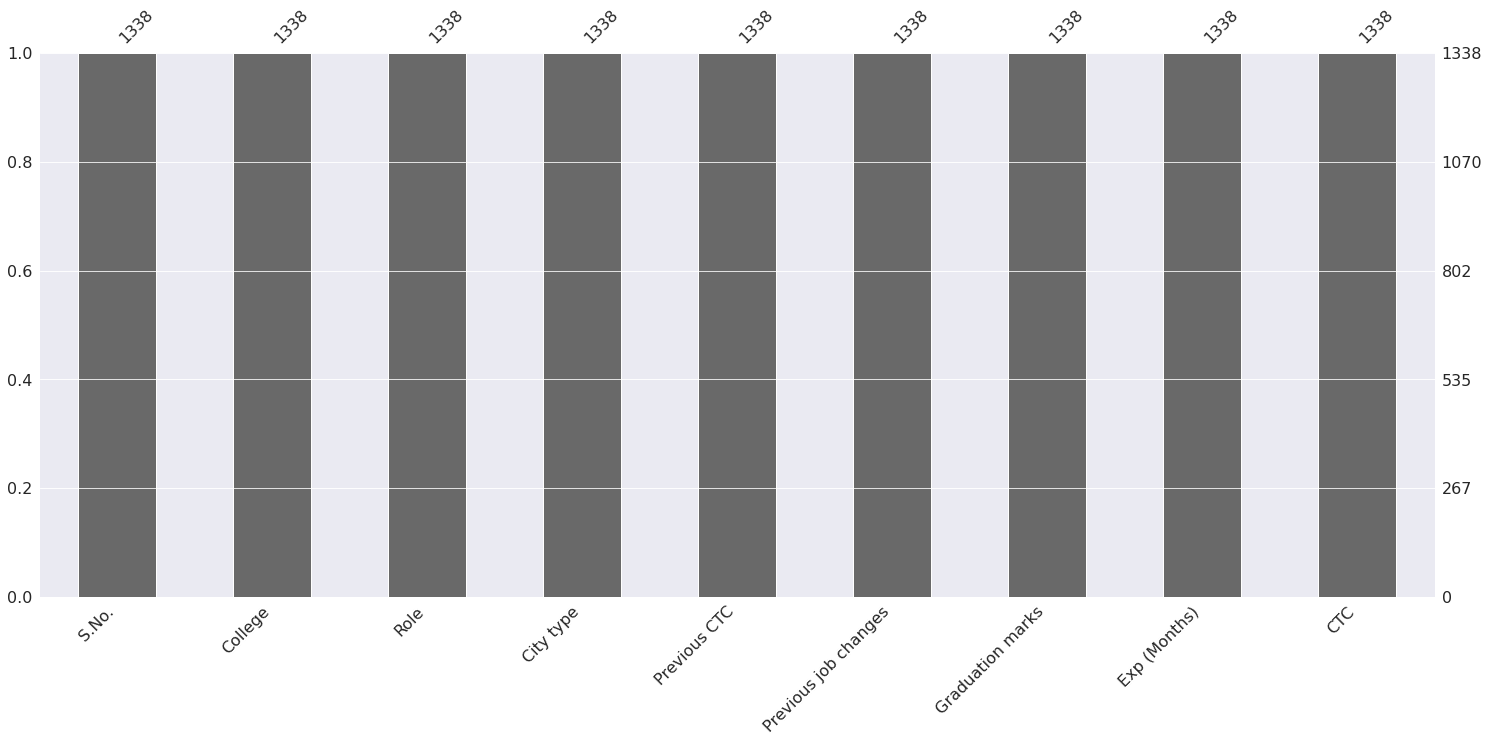

In [6]:
mngo.bar(train_data)

S.No.                   0
College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

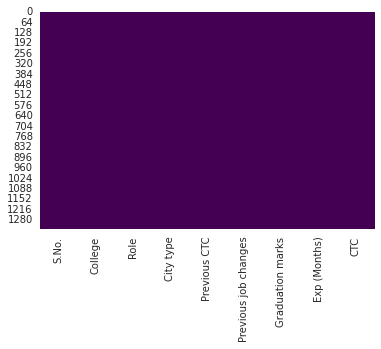

In [7]:
sns.heatmap(train_data.isnull(),cbar = False,cmap = 'viridis')
train_data.isnull().sum()

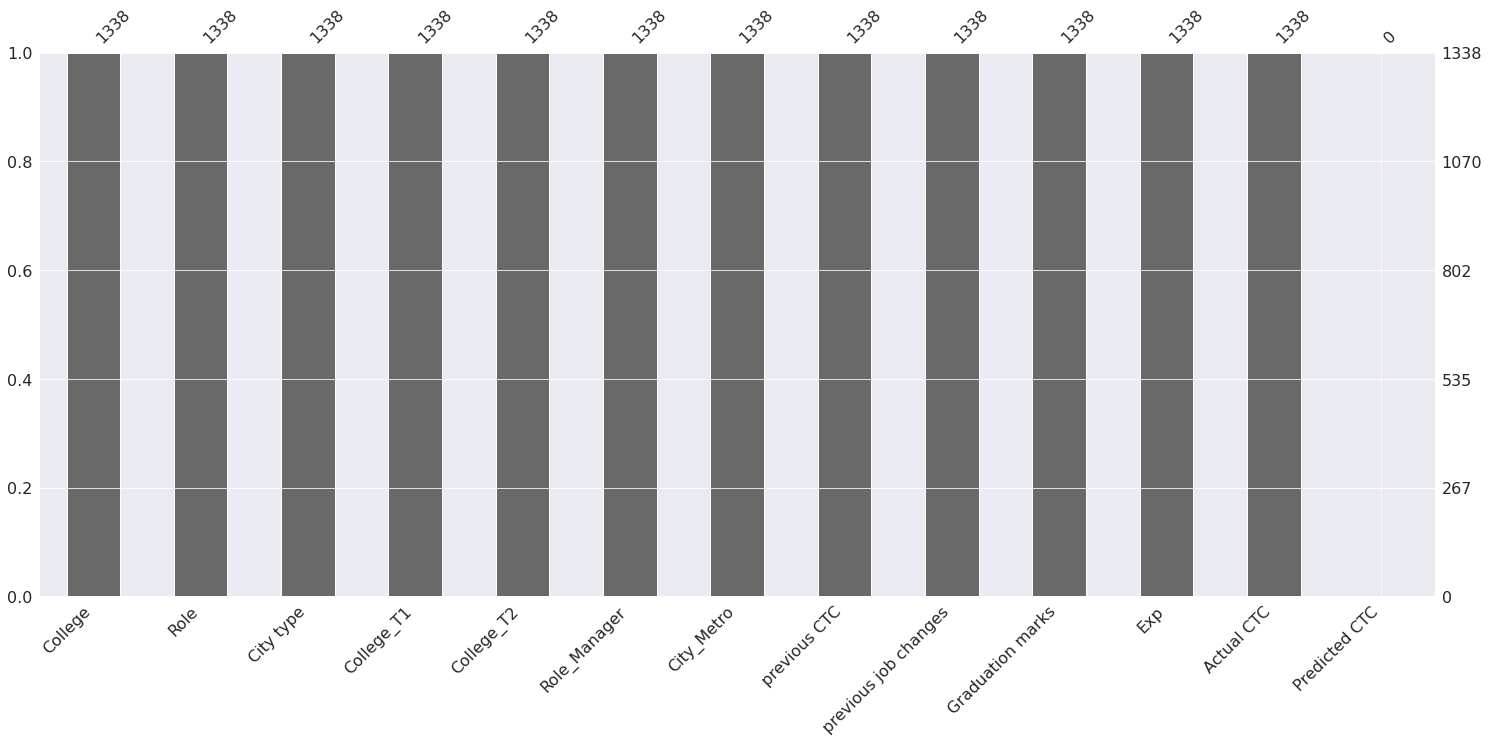

In [8]:
mngo.bar(test_data)

In [9]:
test_data.drop(['Predicted CTC'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   College_T1            1338 non-null   int64  
 4   College_T2            1338 non-null   int64  
 5   Role_Manager          1338 non-null   int64  
 6   City_Metro            1338 non-null   int64  
 7   previous CTC          1338 non-null   int64  
 8   previous job changes  1338 non-null   int64  
 9   Graduation marks      1338 non-null   int64  
 10  Exp                   1338 non-null   int64  
 11  Actual CTC            1338 non-null   float64
dtypes: float64(1), int64(8), object(3)
memory usage: 125.6+ KB


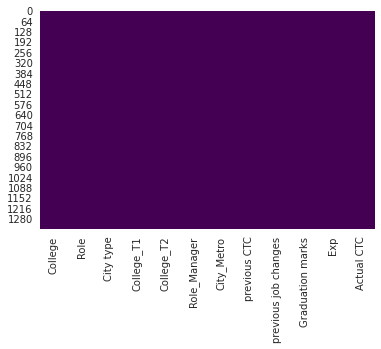

In [10]:
sns.heatmap(test_data.isnull(),cbar = False,cmap = 'viridis')
test_data.info()

##Converting Categorical values to Numerical Values of both data set

In [11]:
#converting cat to num and obj to float

train_data.drop('S.No.',axis=1,inplace= True)
train_data = pd.get_dummies(columns=['College','Role','City type'],drop_first=True,data=train_data)
train_data["CTC"] = [float(str(i).replace(",", "")) for i in train_data["CTC"]]
train_data["Previous CTC"] = [float(str(i).replace(",", "")) for i in train_data["Previous CTC"]]

In [12]:
test_data = pd.get_dummies(columns=['College','City type'],drop_first=True,data=test_data)
test_data["Actual CTC"] = [float(str(i).replace(",", "")) for i in test_data["Actual CTC"]]
test_data["previous CTC"] = [float(str(i).replace(",", "")) for i in test_data["previous CTC"]]

In [13]:
test_data.head(5)

,Role,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_Tier 2,College_Tier 3,City type_Non-Metro
0,Manager,1,0,1,0,55523.0,3,66,19,71406.57653,0,0,1
1,Executive,0,1,0,1,57081.0,1,84,18,68005.87063,1,0,0
2,Executive,0,1,0,1,60347.0,2,52,28,76764.02028,1,0,0
3,Executive,0,0,0,1,49010.0,2,81,33,82092.38688,0,1,0
4,Executive,0,0,0,1,57879.0,4,74,32,73878.09773,0,1,0


##Data Observation

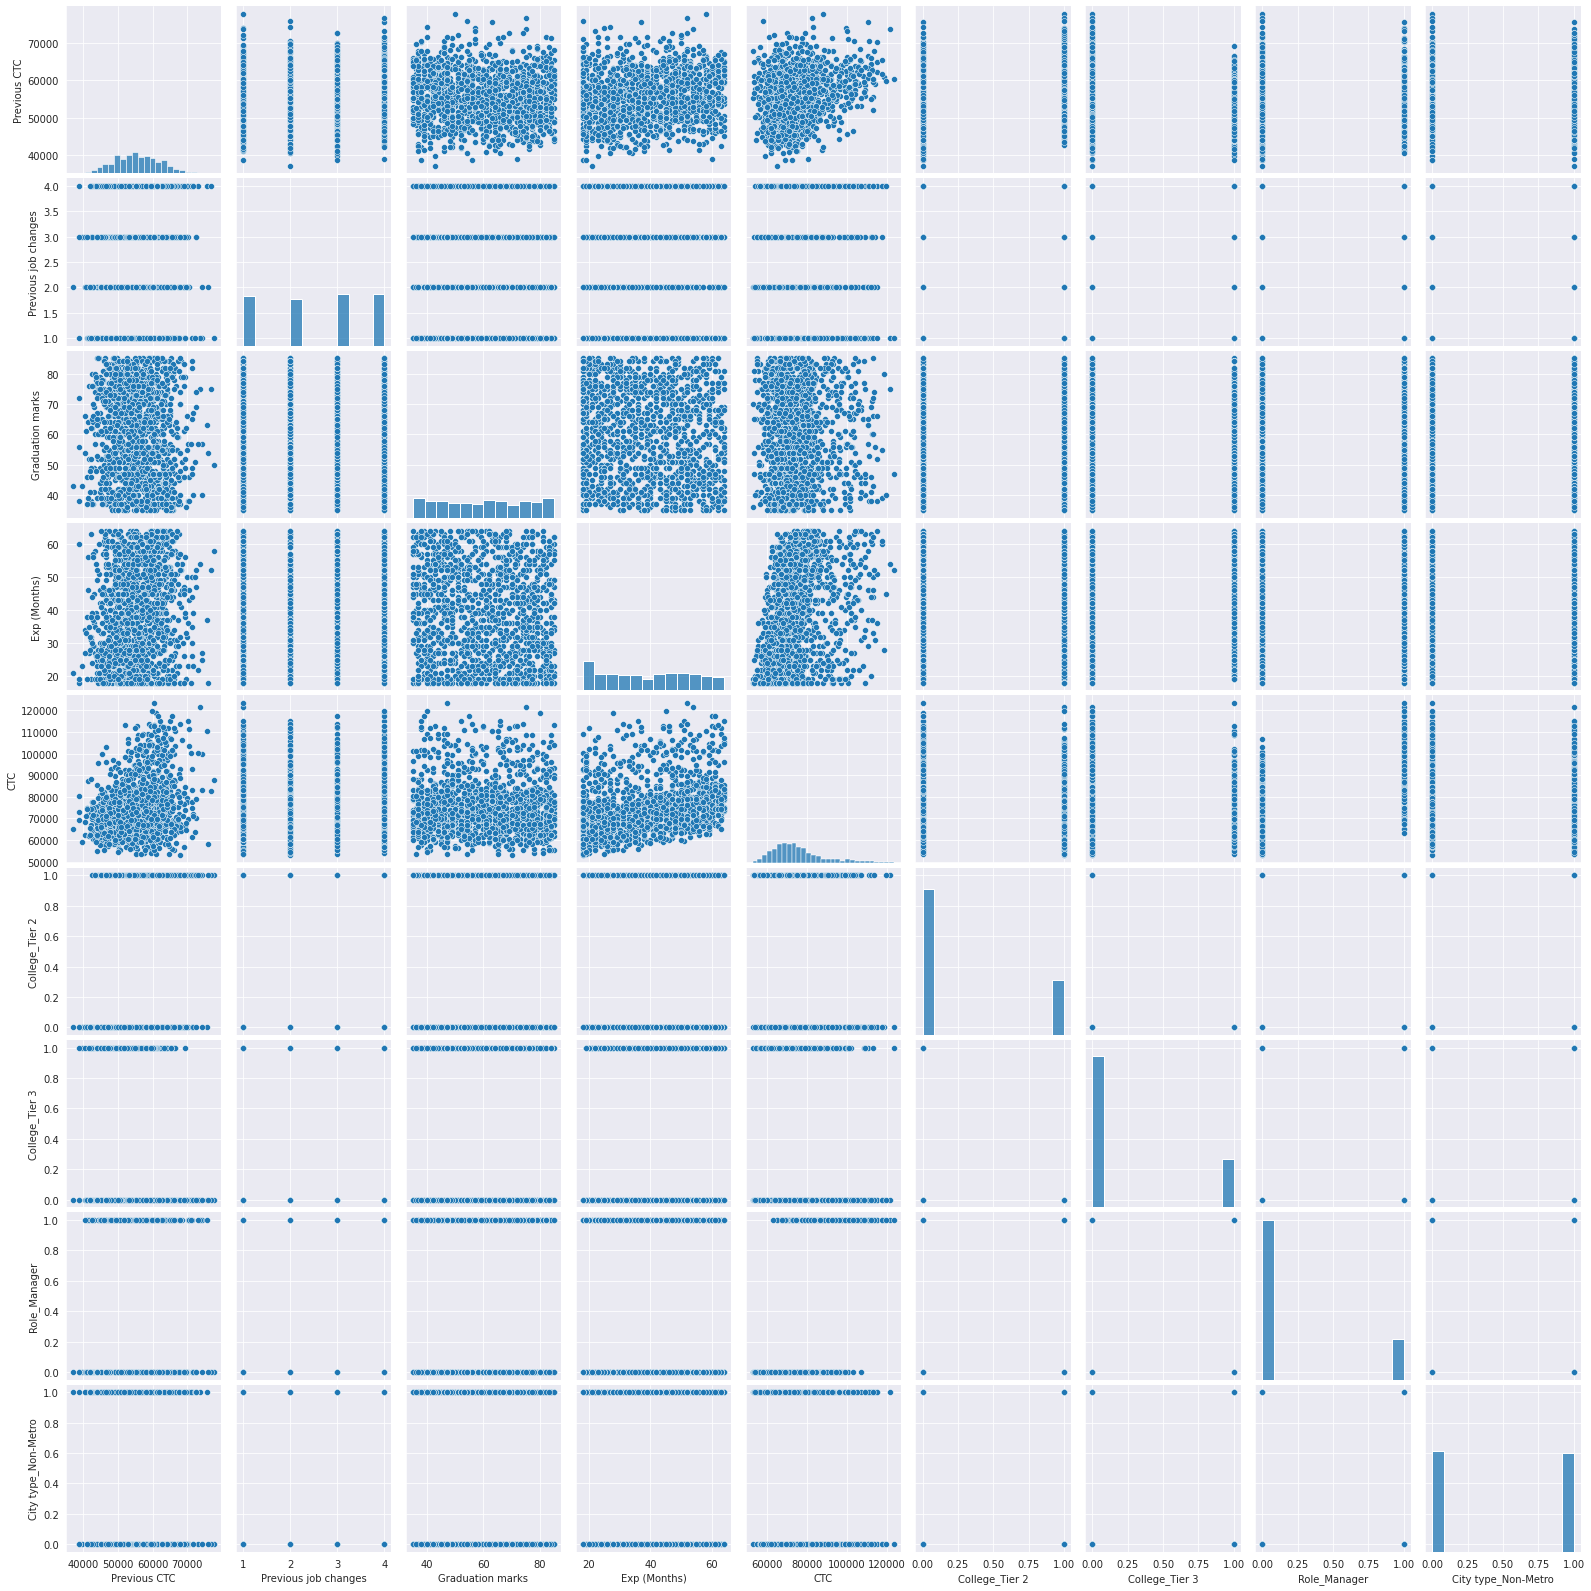

In [14]:
sns.pairplot(train_data)

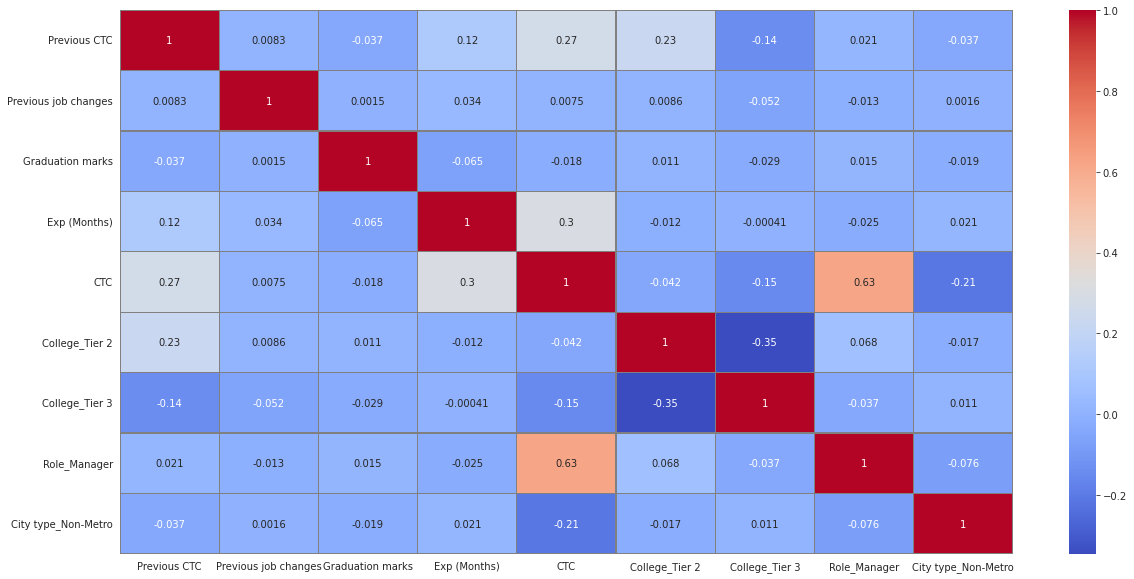

In [15]:
train_corr=train_data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(train_corr,annot = True,cmap = 'coolwarm',linewidths=0.2, linecolor="gray")

#Spitting Data

In [16]:
new_test = test_data.drop(['Actual CTC','Role'],axis = 1)
new_test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 2,College_Tier 3,City type_Non-Metro
0,1,0,1,0,55523.0,3,66,19,0,0,1
1,0,1,0,1,57081.0,1,84,18,1,0,0
2,0,1,0,1,60347.0,2,52,28,1,0,0
3,0,0,0,1,49010.0,2,81,33,0,1,0
4,0,0,0,1,57879.0,4,74,32,0,1,0


In [17]:
#Rearranging new test columns
new_test = new_test[['previous CTC', 'previous job changes', 'Graduation marks', 'Exp','College_Tier 2', 'College_Tier 3','Role_Manager','City type_Non-Metro']]
new_test.head()

,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523.0,3,66,19,0,0,1,1
1,57081.0,1,84,18,1,0,0,0
2,60347.0,2,52,28,1,0,0,0
3,49010.0,2,81,33,0,1,0,0
4,57879.0,4,74,32,0,1,0,0


In [18]:
#Spliting in 4 main categories
X_train = train_data.drop(['CTC'],axis = 1)
y_train = train_data['CTC']
X_test = new_test
y_test = test_data['Actual CTC']

##Model Implementation and Score

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression(normalize=True)

lr.fit(X_train,y_train)

pred_test = lr.predict(X_test)

In [21]:
from sklearn import metrics

In [22]:
print('Y predict: ', pred_test[:5])
print('Y test: ', test_data['Actual CTC'][:5])

Y predict:  [86123.93772412 65789.54686289 69941.69069909 66843.0384125
 70556.76157943]
Y test:  0    71406.57653
1    68005.87063
2    76764.02028
3    82092.38688
4    73878.09773
Name: Actual CTC, dtype: float64


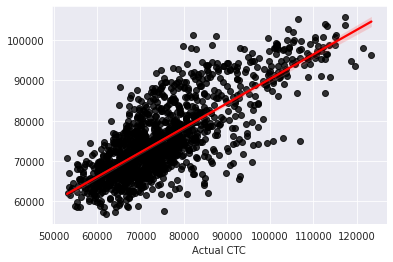

In [23]:
sns.regplot(y_test , pred_test,scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [24]:
print('MSE', metrics.mean_squared_error(y_test,pred_test))

MSE 61677937.04476763


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test , pred_test)

0.6081873160460819

##Filling Predicted CTC column with our prediction results.

In [26]:
pred_ctc = pd.DataFrame(pred_test,columns = ['Predicted CTC'])

#Concating the dataframe with test_dataset
df = pd.concat([test_data,pred_ctc],axis =1)

In [27]:
pred_ctc.head(5)

,Predicted CTC
0,86123.937724
1,65789.546863
2,69941.690699
3,66843.038413
4,70556.761579


In [28]:
#Reindexing the column name
df = df[['previous CTC','previous job changes','Graduation marks', 'Exp','College_Tier 2','College_Tier 3','Role_Manager','City type_Non-Metro','Actual CTC','Predicted CTC']]
df.head(10)

,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro,Actual CTC,Predicted CTC
0,55523.0,3,66,19,0,0,1,1,71406.57653,86123.937724
1,57081.0,1,84,18,1,0,0,0,68005.87063,65789.546863
2,60347.0,2,52,28,1,0,0,0,76764.02028,69941.690699
3,49010.0,2,81,33,0,1,0,0,82092.38688,66843.038413
4,57879.0,4,74,32,0,1,0,0,73878.09773,70556.761579
5,54340.0,4,73,31,1,0,0,1,59950.89225,63790.433370
6,60298.0,1,42,46,1,0,0,1,66602.33931,70565.481641
7,49944.0,2,56,37,0,1,0,1,57768.43504,64311.320569
8,53124.0,4,40,37,0,0,0,0,70083.30436,74488.050946
9,51141.0,1,47,60,0,1,0,1,85648.48147,70869.424738


In [29]:
df.to_excel('predictionv.xlsx', index=False)
df

,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro,Actual CTC,Predicted CTC
0,55523.0,3,66,19,0,0,1,1,71406.57653,86123.937724
1,57081.0,1,84,18,1,0,0,0,68005.87063,65789.546863
2,60347.0,2,52,28,1,0,0,0,76764.02028,69941.690699
3,49010.0,2,81,33,0,1,0,0,82092.38688,66843.038413
4,57879.0,4,74,32,0,1,0,0,73878.09773,70556.761579
...,...,...,...,...,...,...,...,...,...,...
1333,59661.0,4,68,50,0,1,0,0,69712.40366,76044.346272
1334,53714.0,1,67,18,0,0,0,1,69298.75010,65742.551429
1335,61957.0,1,47,18,1,0,0,1,66397.77069,64046.074943
1336,53203.0,3,69,21,0,0,0,1,64044.38295,66223.222142




##For Better accuracy we tried Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor


In [31]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)

In [32]:
print('MSE', metrics.mean_squared_error(y_test,pred_dt))


MSE 8.298056654399658e-06


In [33]:
r2_score(y_test , pred_dt)

0.9999999999999473

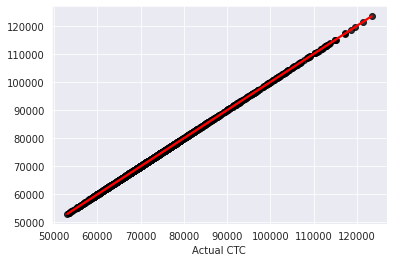

In [34]:
sns.regplot(y_test , pred_dt,scatter_kws={"color": "black"}, line_kws={"color": "red"})

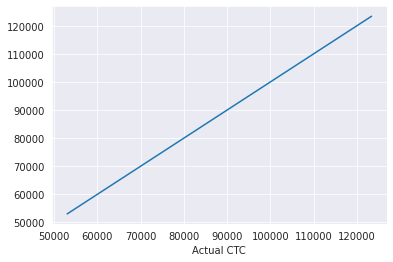

In [35]:
sns.lineplot(y_test , pred_dt)